# **Boston Airbnb Data Analysis**


1.   **Following CRISP-DM methodology**
2.   Used Data files

    * listings.csv
    * reviews.csv

-----------------------------------------------------

1.   Business Understanding (CRISP-DM)

    * Which neighbourhood have high prices?
    * Which street is richest? - By our data, we can analyze which streets are Top 5 richest!
    * Relationship between Positive & Negative words in review data & review_scores, price

2.   Data Understanding

3.   Data Preparation
    * Data Preprocessing
    * Filling NAN Values
4. Modeling 
    * Making Model that predict price!
5. Evaluation
    * MAE
    * RMSE

6. Deployment










# **Business Understanding**

* Q1) Which neighbourhood have high prices?
* Q2) Which street is richest? - By our data, we can analyze which streets are Top 5 richest!
* Q3) Relationship between Positive & Negative words in review data & review_scores, price

# **Data Understanding**

In [ ]:
!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

from tqdm import tqdm

In [36]:
df = pd.read_csv('/content/drive/MyDrive/Project1_boston_seatle/boston/listings.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [38]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [39]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1

In [40]:
df.isnull().sum().sort_values(ascending = False)

neighbourhood_group_cleansed    3585
jurisdiction_names              3585
license                         3585
has_availability                3585
square_feet                     3529
                                ... 
state                              0
neighbourhood_cleansed             0
street                             0
host_identity_verified             0
id                                 0
Length: 95, dtype: int64

# **Data Preparation & Evaluation**

Filling Missing Values



*   Process of filling missing values is necessary for modeling.
Our ML model can't understand NAN values. So we need to fill those missing values.
*   I filled -1 because my catboost model can predict well and recognize about missing values if it filled with -1



In [41]:
for i in df.columns:
  if df[i].dtypes == object:
    df[i] = df[i].fillna('nan')
  else:
    df[i] = df[i].fillna(-1)

df.isnull().sum().max()  # checking result

0

### **Q1) Which neighbourhood have high prices?**

### Price preprocessing

In [71]:
def price_preprocessing(a):
  '''
  This Func is for preprocessing the price column.
  Make price column dtype object to float
  '''
  p = []
  for i in a:
    try:
      p.append(float(i[1:].replace(',','')))
    except:
      p.append(np.nan)
  return p

In [ ]:
df['price'] = price_preprocessing(df['price'])

#### **Visualization**

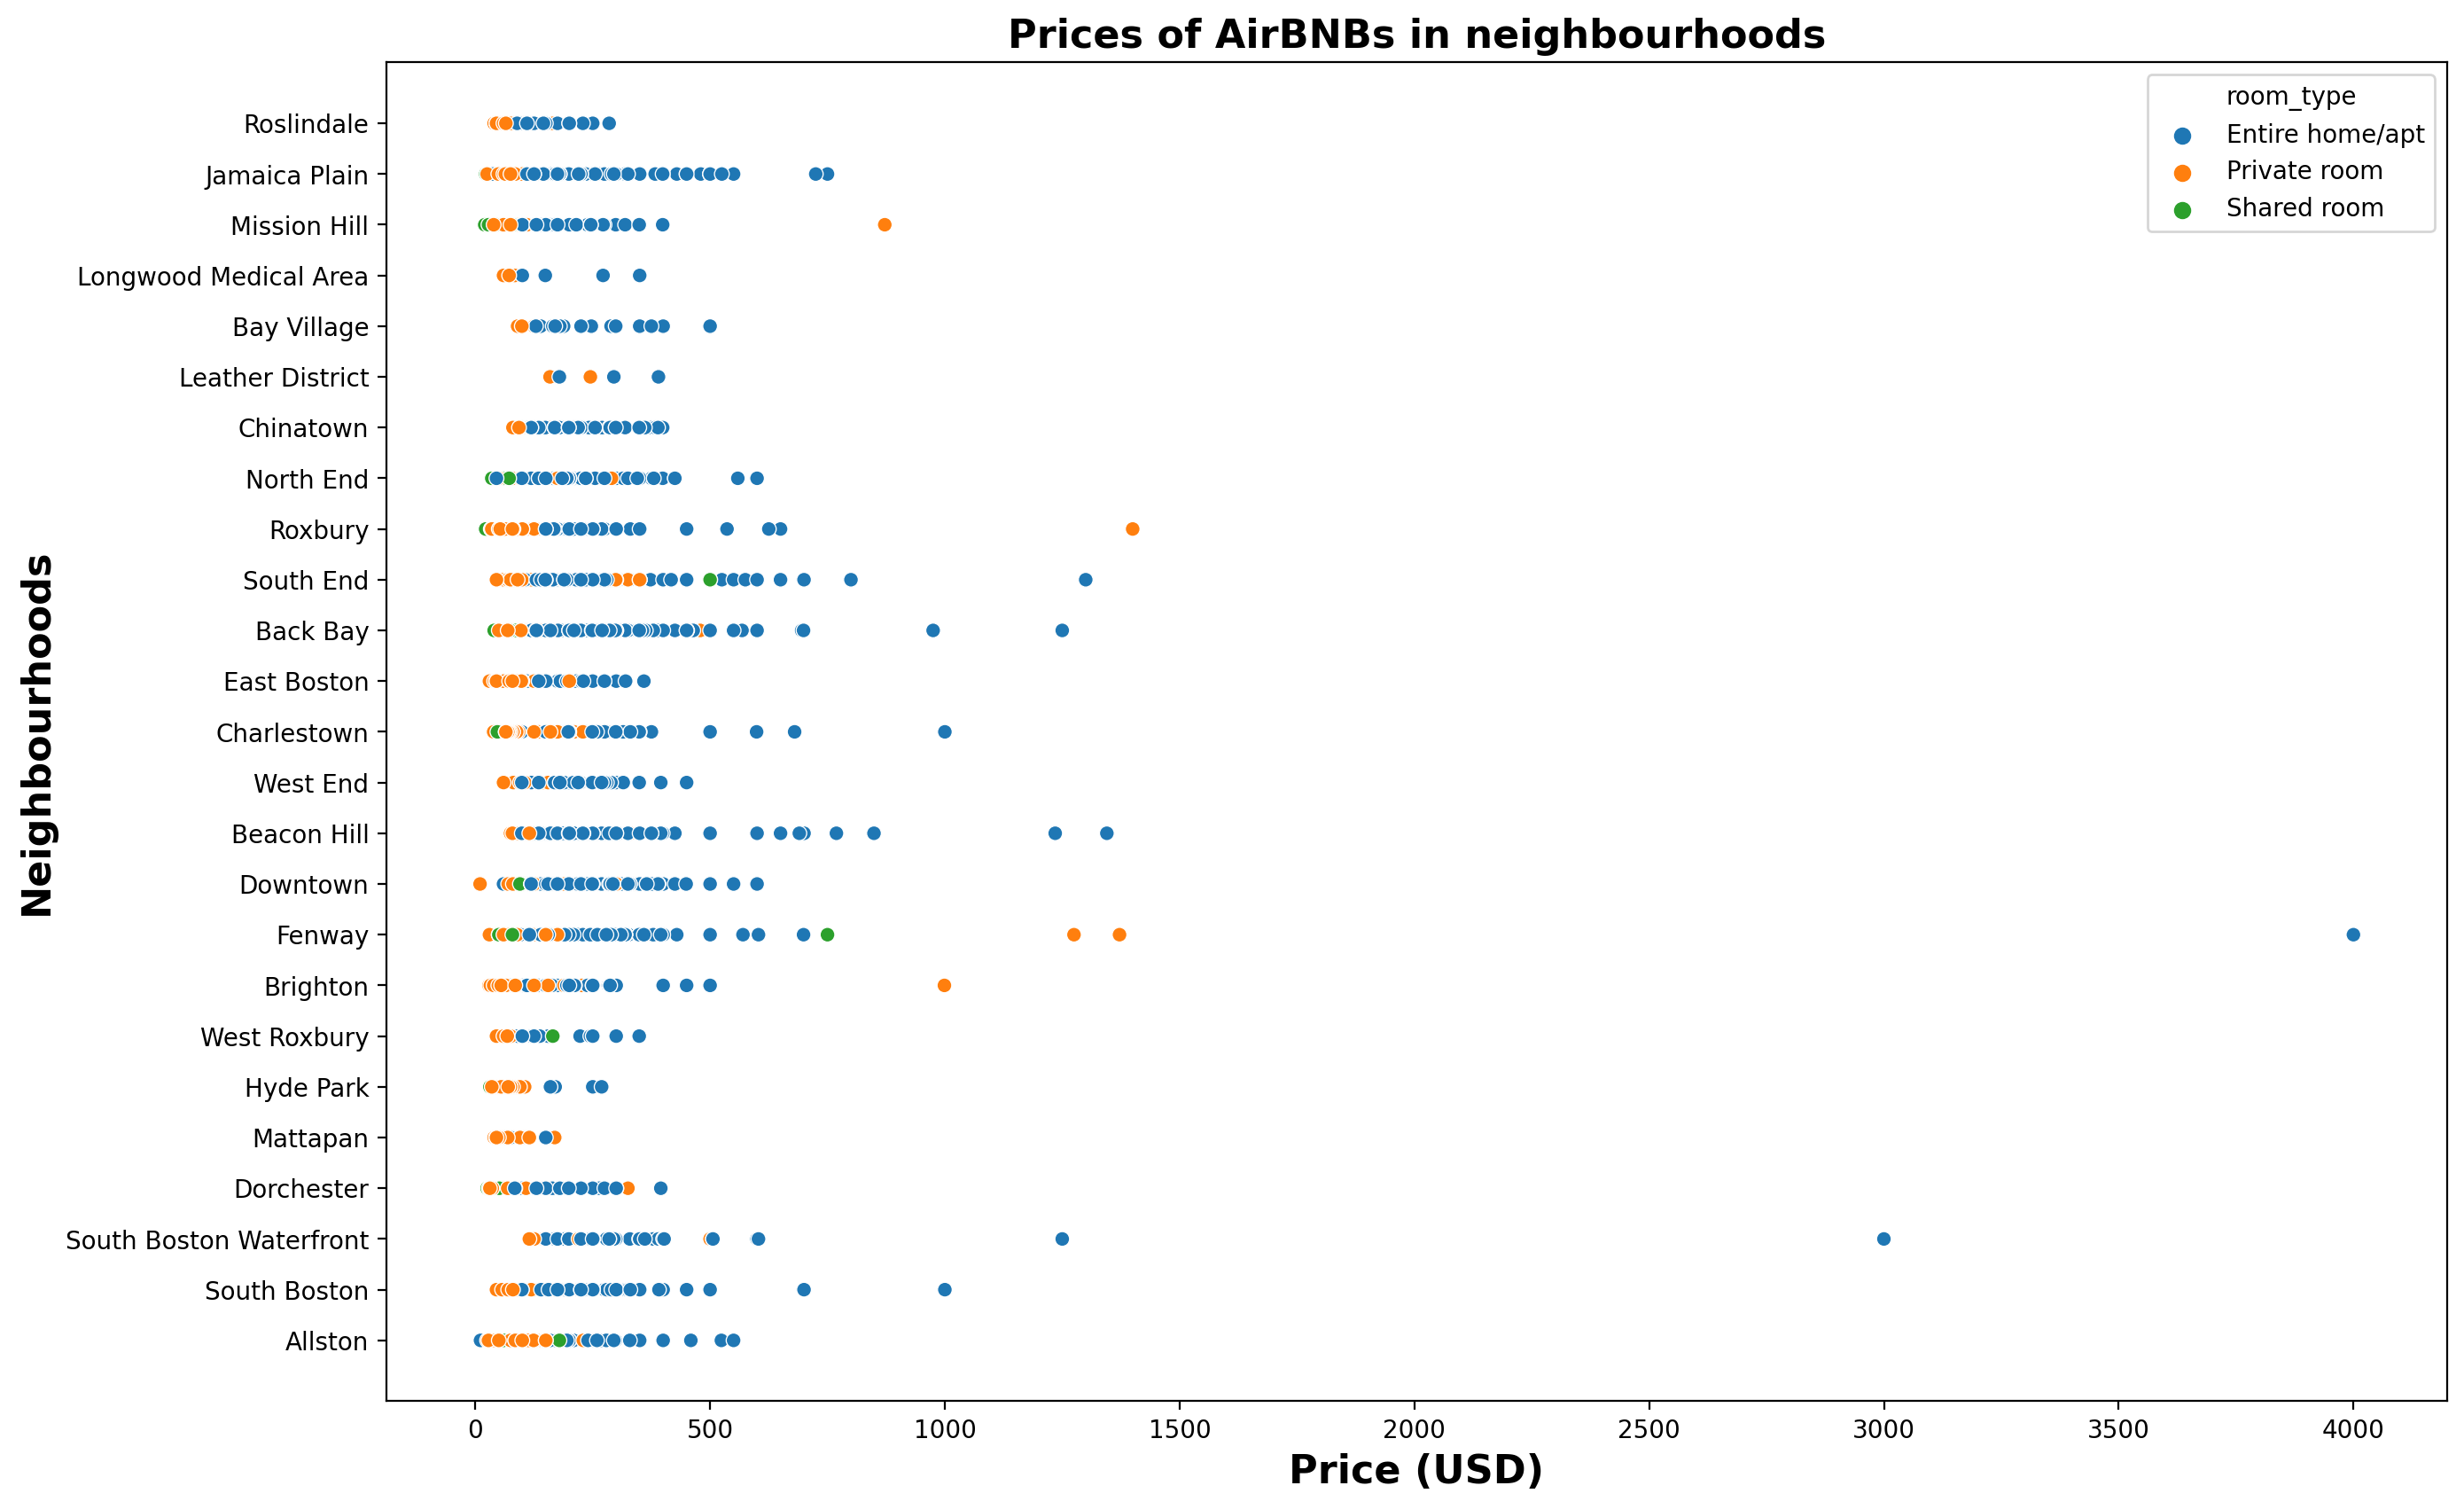

In [43]:
plt.figure(figsize=(15, 10), dpi=200)
plt.title('Prices of AirBNBs in neighbourhoods', size = 16, weight = 'bold');
plt.ylabel('Neighbourhoods', size = 16, weight = 'bold');
plt.xlabel('Price (USD)', size = 16, weight = 'bold');
base_color = sns.color_palette()[0]
sns.scatterplot(x='price', y='neighbourhood_cleansed',hue='room_type',data=df); # https://seaborn.pydata.org/generated/seaborn.scatterplot.html

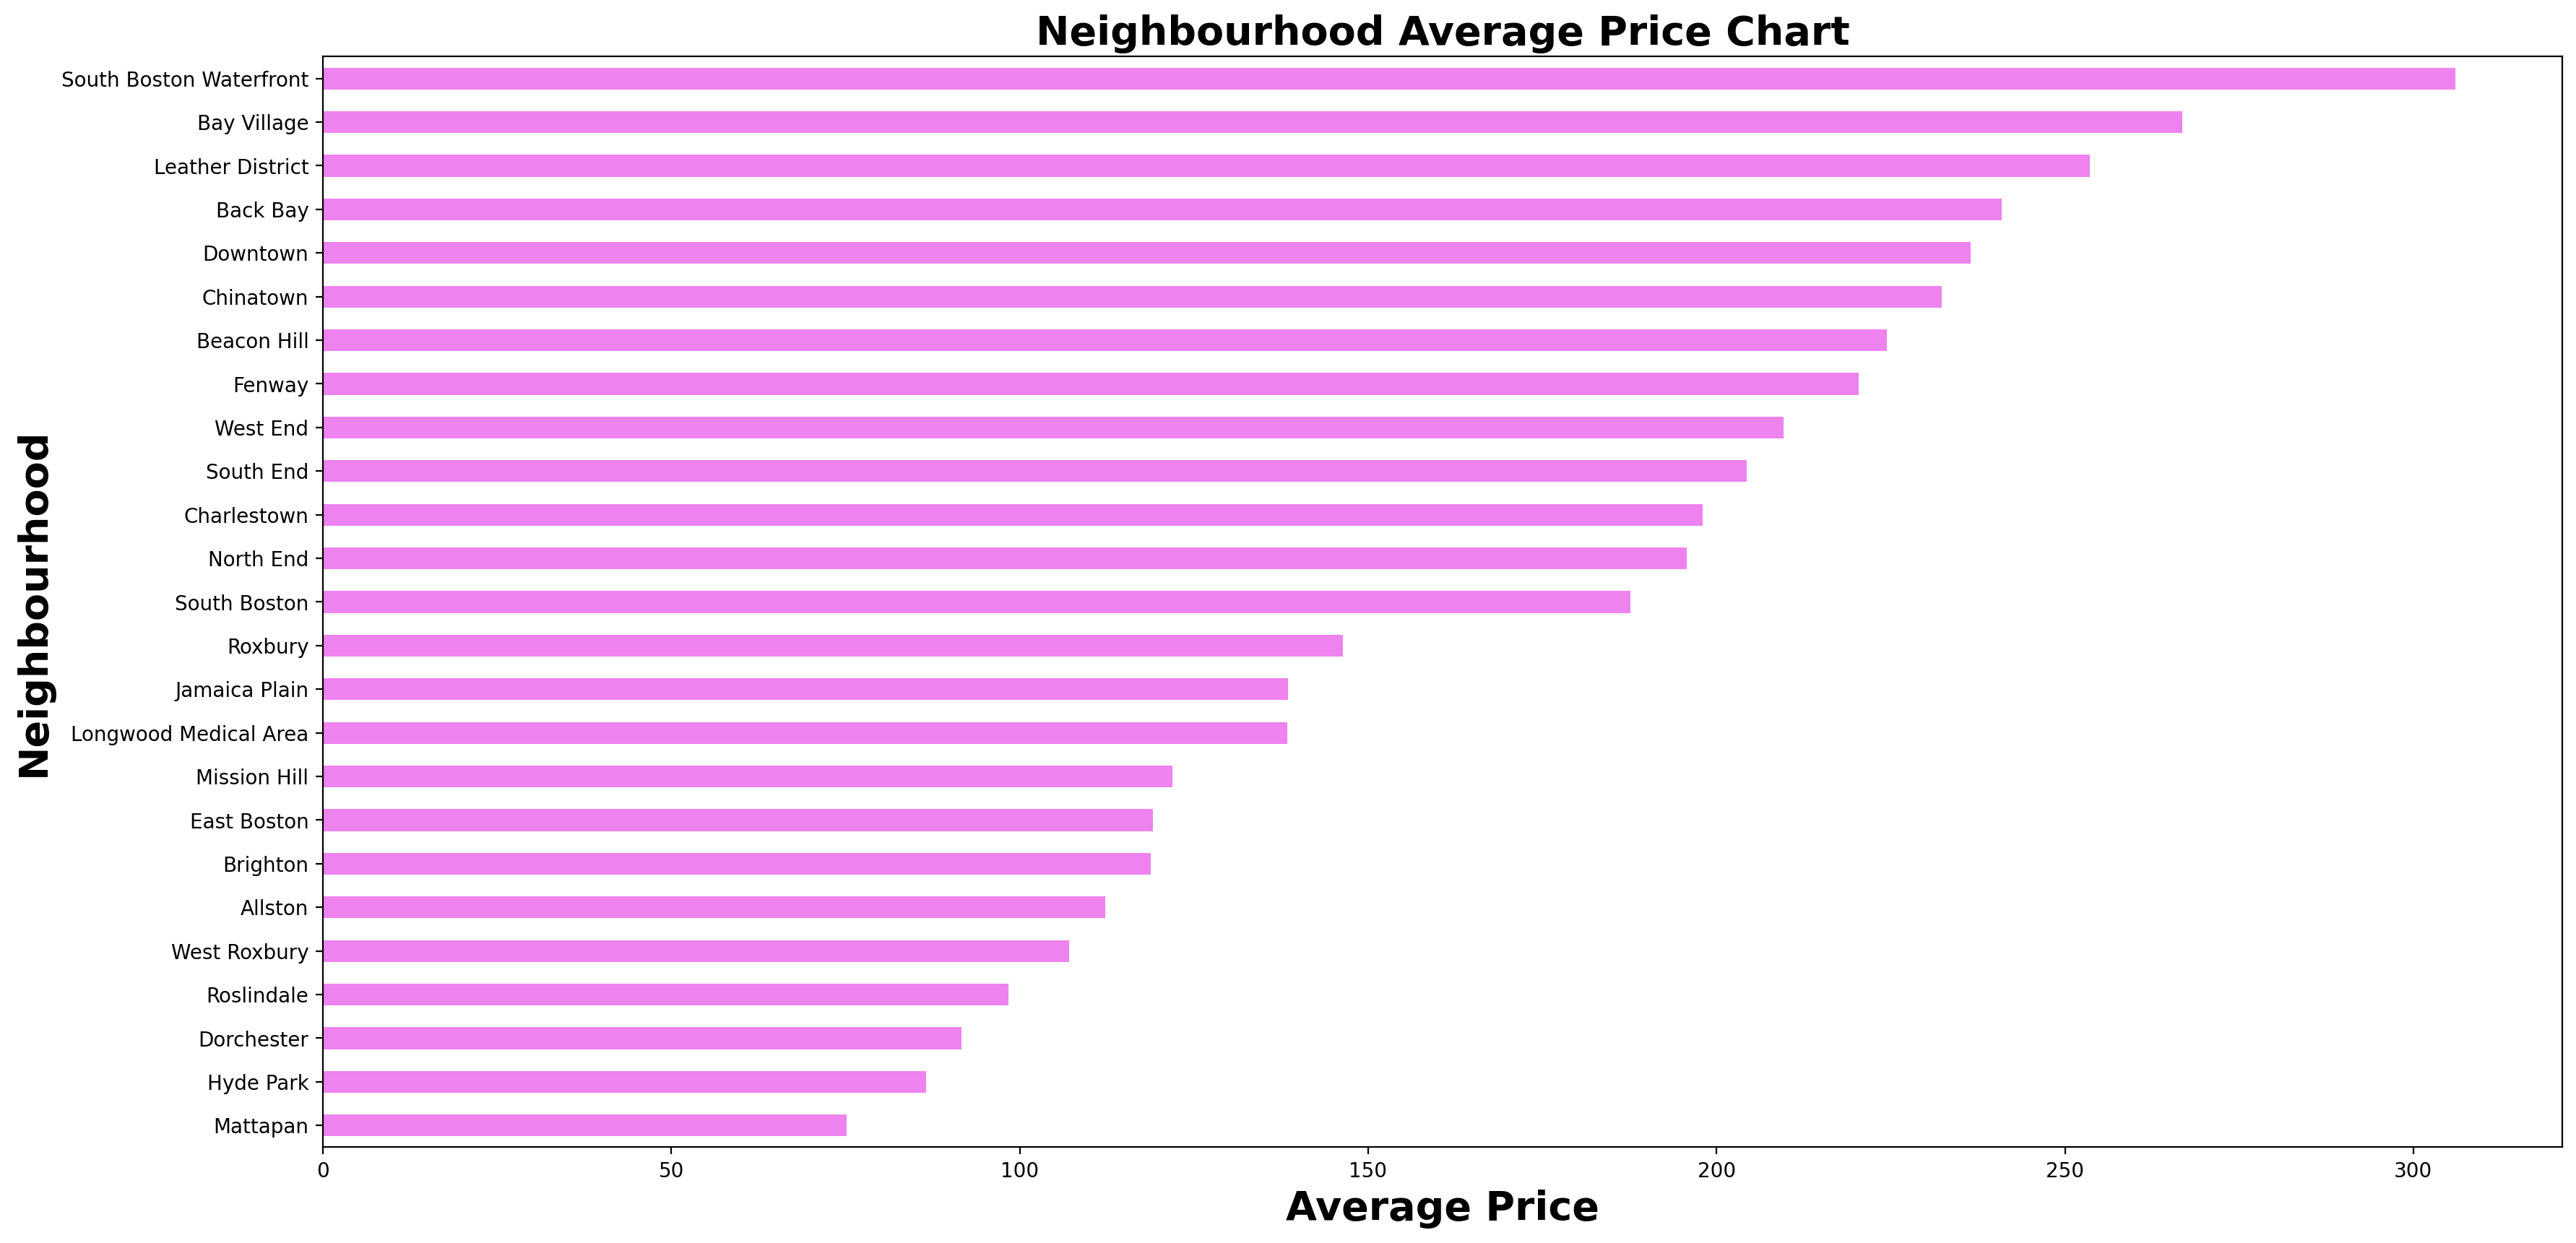

In [44]:
price_per_neighbourhood = df.groupby(['neighbourhood_cleansed']).price.mean().sort_values(ascending = True)
plt.figure(figsize=(20,10), dpi=200);
price_per_neighbourhood.plot(kind='barh', color='violet');
plt.xlabel('Average Price', weight='bold', size =20)
plt.ylabel('Neighbourhood', weight = 'bold', size =20)
plt.title('Neighbourhood Average Price Chart', weight ='bold', size = 20);

#### **Result**

Thus, we can conclude that Leather District has the highest price amongst other neighbourhoods.

### **Q2) Which street is most expensive?**

#### **Preprocessing Street Column**

- From street column, Extracting Street Name

In [45]:
a = list(df['street'].values)          # copy street column's values
for i in range(len(a)):                # split street column's data basis of ','
  df['street'][i] = a[i].split(',')[0]

#### **Visualization**

- Top 5 Rich Street By Our Data

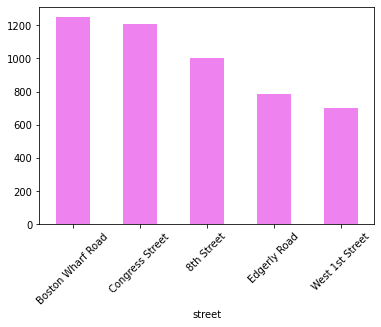

In [46]:
# Using groupby function, we can sort those values

a = df.groupby(df['street'])['price'].mean().sort_values(ascending = False).head(5)
a.plot(kind = 'bar', color = 'violet');
plt.xticks(rotation=45);

#### **Result**

By google map, these streets are near by ocean!

Actually, I'm not living in boston(I'm korean). But I can guess that those streets are rich.

### **Q3) Relationship between Review of AIRBNB Data & Host info**

I wondered about relationship between review data and host-info!

At first, I counted positive & negative words in review data.

And merged this data with DataFrame 'df'

#### **Preprocessing**

*  **Counting Postive & Negative words in Review Data**
*  **Merging DataFrame**
*  **Filling Missing Values (-1)**

In [47]:
df_re = pd.read_csv('/content/drive/MyDrive/Project1_boston_seatle/boston/reviews.csv')
df_re

def word_counting(df, column, feature):
  '''
        This function makes given dataframe's column data split and counts words!
  '''
  ls = []
  for c in range(68275):
    n = 0
    try:
      for i in df[column][c].split():
        if i in feature:
          n += 1
        else:
          pass
    except:
      n = 0
    ls.append(n)
  return ls

# --------------------- Merging -------------------# 
feature_bad = ['bad', 'dirty', 'uncomfortable', 'terrible', 'Bad', 'Dirty', 'Uncomfortable', 'sucio', 'malo', 'incómodo']
feature_good = ['good', 'clean', 'nice', 'great', 'Great', 'Nice', 'comfortable', 'Good', 'cool', 'Cool', 'Clean', 'enjoyed', 'bien', 'ajustado', 'cozy', 'Cozy']

df_re['counts_good'] = word_counting(df_re, 'comments', feature_good)
df_re['counts_bad'] = word_counting(df_re, 'comments', feature_bad)

df_re = df_re[['listing_id', 'counts_good', 'counts_bad']]
df_re.columns = ['id', 'counts_good', 'counts_bad']
df = pd.merge(df, df_re, on = 'id', how = 'left')

#### **Visualization**

##### **Review values - Word counts**

100%|██████████| 7/7 [00:11<00:00,  1.58s/it]


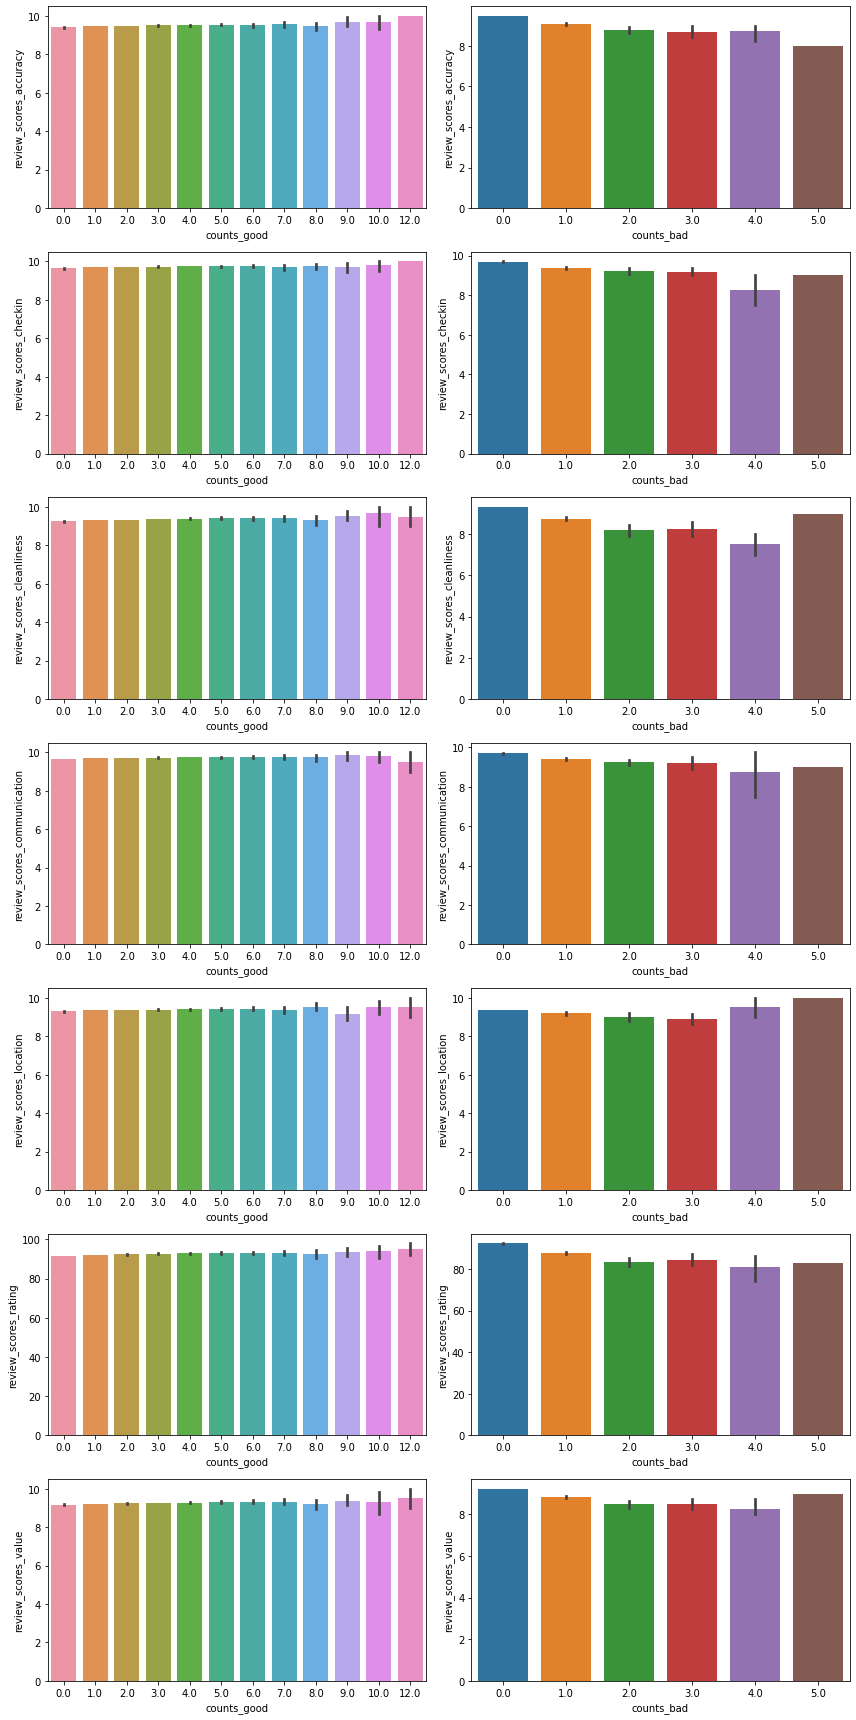

In [48]:
review_cols = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value']

fig, ax = plt.subplots(len(review_cols), 2, figsize=(12,24))

for i in tqdm(range(len(review_cols))):         
  sns.barplot(df['counts_good'], df[review_cols[i]], ax = ax[i, 0])
  sns.barplot(df['counts_bad'], df[review_cols[i]], ax = ax[i, 1])

plt.tight_layout()
plt.show()

With above graphs, we can see that Cleanliness have clear relation with counts_bad column! It means customer's reviews are almost about cleanliness review!

##### **Price - Word counts**

100%|██████████| 7/7 [00:11<00:00,  1.60s/it]


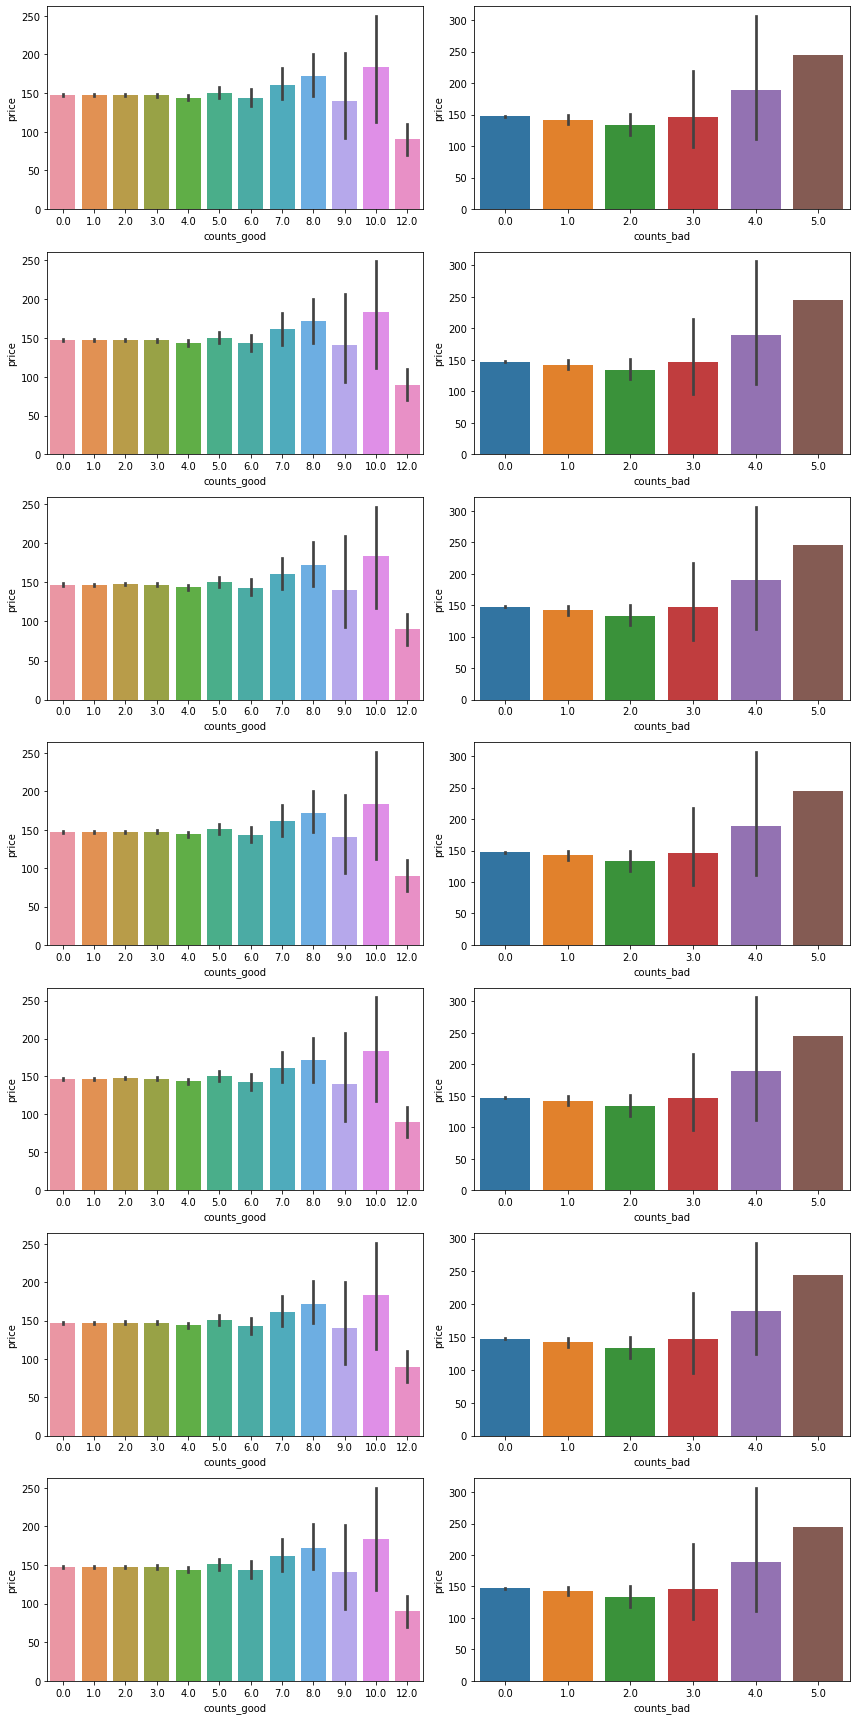

In [49]:
review_cols = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value']

fig, ax = plt.subplots(len(review_cols), 2, figsize=(12,24))

for i in tqdm(range(len(review_cols))):
  sns.barplot(df['counts_good'], df['price'], ax = ax[i, 0])
  sns.barplot(df['counts_bad'], df['price'], ax = ax[i, 1])

plt.tight_layout()
plt.show()

#### **Result**

We can see that both distributions of Review values which are seperated by P&N words counts are different!

*   We can conclude that this data is reliable!

If you wanna get more customer, you should analyze of review data and make your own strategy.

There are many bad places that cost more expensive than good places.
I conclude that those who own airbnb which had bad review should change their place cost!


# **Modeling**



*   Regression Model for price
  *   **Using catboost regression model**
  *   **CatBoost Regression model can predict even if there are many missing values filled with -1**
*   Only using specific columns to predict



In [82]:
feature = ['neighbourhood_cleansed','review_scores_cleanliness', 'room_type', 'accommodates', 'bed_type', 'number_of_reviews',
               'review_scores_rating', 'street', 'price']

In [83]:
X = df[feature]
X

,neighbourhood_cleansed,review_scores_cleanliness,room_type,accommodates,bed_type,number_of_reviews,review_scores_rating,street,price
0,Roslindale,-1.0,Entire home/apt,4,Real Bed,0,-1.0,Birch Street,250.0
1,Roslindale,9.0,Private room,2,Real Bed,36,94.0,Pinehurst Street,65.0
2,Roslindale,9.0,Private room,2,Real Bed,36,94.0,Pinehurst Street,65.0
3,Roslindale,9.0,Private room,2,Real Bed,36,94.0,Pinehurst Street,65.0
4,Roslindale,9.0,Private room,2,Real Bed,36,94.0,Pinehurst Street,65.0
...,...,...,...,...,...,...,...,...,...
69026,Allston,-1.0,Private room,2,Real Bed,0,-1.0,Freeman Street,150.0
69027,Charlestown,-1.0,Entire home/apt,4,Real Bed,0,-1.0,Child Street,198.0
69028,Charlestown,8.0,Private room,2,Real Bed,2,90.0,George St Somerville,65.0
69029,Charlestown,8.0,Private room,2,Real Bed,2,90.0,George St Somerville,65.0


## **Encoding categorical columns**

*   Our model needs full-numeric-data
*   We need to change dtypes!



In [84]:
X = pd.get_dummies(X)
X

,review_scores_cleanliness,accommodates,number_of_reviews,review_scores_rating,price,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,street_,street_13th St,...,street_Westwind Road,street_White Street,street_Whiting Street,street_Whittier Place,street_Williams Street,street_Willow Court,street_Winchester Street,street_Windermere Road,street_Winfield Street,street_Winship Street,street_Winslow Road,street_Winter St,street_Winter Street,street_Winthrop Street,street_Woodbourne Rd,street_Woodbourne Road,street_Woodlawn Street,street_Woodmont Street,street_Woodstock Avenue,street_Worcester Square,street_Worcester Street,street_Worthington Street,street_Wyman Street,street_Yarmouth Place,street_Yarmouth Street,street_Zamora Court,street_Zamora Street,street_boylston st.,street_crescent ave,street_dorchester ave,street_kneeland st,street_lubec,street_marlborough st,street_milk street,street_murdock,street_poplar st,street_sulllivan street,street_vinal street,street_west,street_波士顿
0,-1.0,4,0,-1.0,250.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.0,2,36,94.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.0,2,36,94.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.0,2,36,94.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.0,2,36,94.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69026,-1.0,2,0,-1.0,150.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69027,-1.0,4,0,-1.0,198.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69028,8.0,2,2,90.0,65.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69029,8.0,2,2,90.0,65.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
y = X['price']
X = X.drop(columns = 'price')

## **Train-Test-Split**

We need to split our data X for validation!

In [89]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

## **CatBoost Regression**

In [94]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor()
cat.fit(x_train, y_train, verbose = 100)

Learning rate set to 0.079708
0:	learn: 94.8249211	total: 11.1ms	remaining: 11.1s
100:	learn: 51.0382062	total: 922ms	remaining: 8.21s
200:	learn: 44.1189224	total: 1.77s	remaining: 7.06s
300:	learn: 40.2394676	total: 2.64s	remaining: 6.13s
400:	learn: 37.2195946	total: 3.48s	remaining: 5.2s
500:	learn: 34.8442524	total: 4.29s	remaining: 4.27s
600:	learn: 32.6686258	total: 5.1s	remaining: 3.39s
700:	learn: 31.2408976	total: 5.97s	remaining: 2.54s
800:	learn: 29.6336764	total: 6.83s	remaining: 1.7s
900:	learn: 28.1309104	total: 7.69s	remaining: 845ms
999:	learn: 26.8635775	total: 8.49s	remaining: 0us


# Evaluation


*   MAE (Mean-Absolute-Error)
*   RMSE (Rooted-Mean-Squared-Error)



In [98]:
result = cat.predict(x_valid)
answer = y_valid

# MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(answer, result)

# RMSE
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(answer, result))

print('MAE :', MAE, '\nRMSE :', RMSE)

MAE : 16.48206629783165 
RMSE : 30.772336547058686
